In [1]:
from dwave.system import DWaveSampler, EmbeddingComposite # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import sys, os, importlib

# Reload modules to ensure the latest changes are picked up
sys.path.append(os.path.abspath("modules"))
import modules.plotting
import modules.dwaveapi
import modules.gendata
importlib.reload(modules.plotting)
importlib.reload(modules.dwaveapi)
importlib.reload(modules.gendata)

from modules.dwaveapi import *
from modules.gendata import *
from modules.plotting import *

np.random.seed(99) # random noise

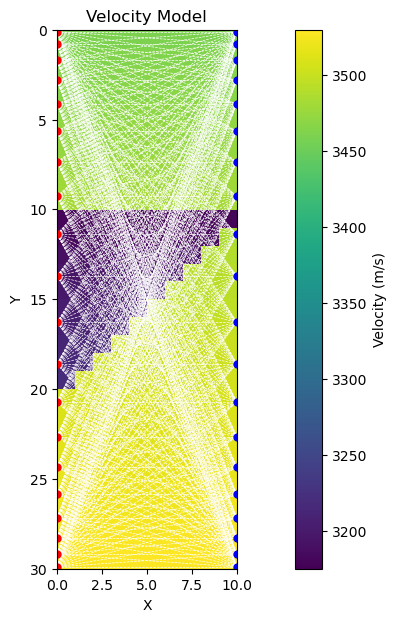

In [2]:
# Defind the velocity model
rows, cols = 30, 10
grid_size = (rows, cols)
velocity_model = velocity_generator(rows, cols)

# Define sources and receivers
# 0.1 and 29.9 are values close to limits
# Change linear to True to generate regular locations
# NOTE: create the z position not on the grid boundary to avoid conflict
z = device_location(n=20, rows=rows, new_min=0.1, new_max=29.9, linear=False)
sources = [(0, i) for i in z]
receivers = [(cols, i ) for i in z]

intersections = find_intersections(sources, receivers, grid_size=grid_size)
unique_intersections = remove_duplicate_intersections(intersections)
distances = calculate_distances(unique_intersections, grid_size=grid_size, sources=sources, receivers=receivers)

plot_velocity_model_with_sources_and_receivers(velocity_model, sources, receivers, cols, rows, showlines=True, linecolor='white', linewidth=.5)

In [ ]:
D, T = [], []
s1 = 1/velocity_model # true velocity
nreceiver = len(receivers)
nsource = len(sources)

for i in range(nsource):
    for j in range(nreceiver):
        D.append(distances[:,:,j,i].flatten())
        T.append(sum(sum(distances[:,:,j,i]*s1)))    
D = np.array(D)
T = np.array(T)
np.save('./input/D.npy', D)
np.save('./input/T.npy', T)
s1 = s1.flatten()
np.save('./input/s1.npy', s1)

In [ ]:
# Add noise 1%
noise_percent = noise_generator(size=400, noise_level=1e-2)
T_noise = T + noise_percent*T
np.save('.input/T-noise-1.npy', T_noise)

In [ ]:
# Add noise 2%
noise_percent = noise_generator(size=400, noise_level=2e-2)
T_noise = T + noise_percent*T
np.save('.input/T-noise-2.npy', T_noise)

In [ ]:
# Add noise 5%
noise_percent = noise_generator(size=400, noise_level=5e-2)
T_noise = T + noise_percent*T
np.save('.input/T-noise-5.npy', T_noise)
np.save('T-noise-5.npy', T_noise)

In [ ]:
# Add noise 10%
noise_percent = noise_generator(size=400, noise_level=10e-2)
T_noise = T + noise_percent*T
np.save('T-noise-10.npy', T_noise)